Using long short term memory(LSTM) to predict the closing stock price of a corporation (Apple Inc.) using 60 day stock price.

In [1]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import random

random.seed(10)

In [2]:
# # get the stcok quote
# df = web.DataReader('aapl', data_source='yahoo',start = '2012-01-01', end ='2019-12-17')
# # show the data
# df
num_of_day = 30

In [3]:
table = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1325390400&period2=1656734399&interval=1d&events=history&includeAdjustedClose=true")
pd.to_datetime(table['Date'])
table = table.set_index('Date')
# print(result)
print(table)
table.info()

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.557467   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.624949   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.765109   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.898554   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.878098   
...                ...         ...         ...         ...         ...   
2022-06-27  142.699997  143.490005  140.970001  141.660004  141.660004   
2022-06-28  142.130005  143.419998  137.320007  137.440002  137.440002   
2022-06-29  137.460007  140.669998  136.669998  139.229996  139.229996   
2022-06-30  137.250000  138.369995  133.770004  136.720001  136.720001   
2022-07-01  136.039993  139.039993  135.660004  138.929993  138.929993   

               Volume  
Date         

In [4]:
table.shape

(2642, 6)

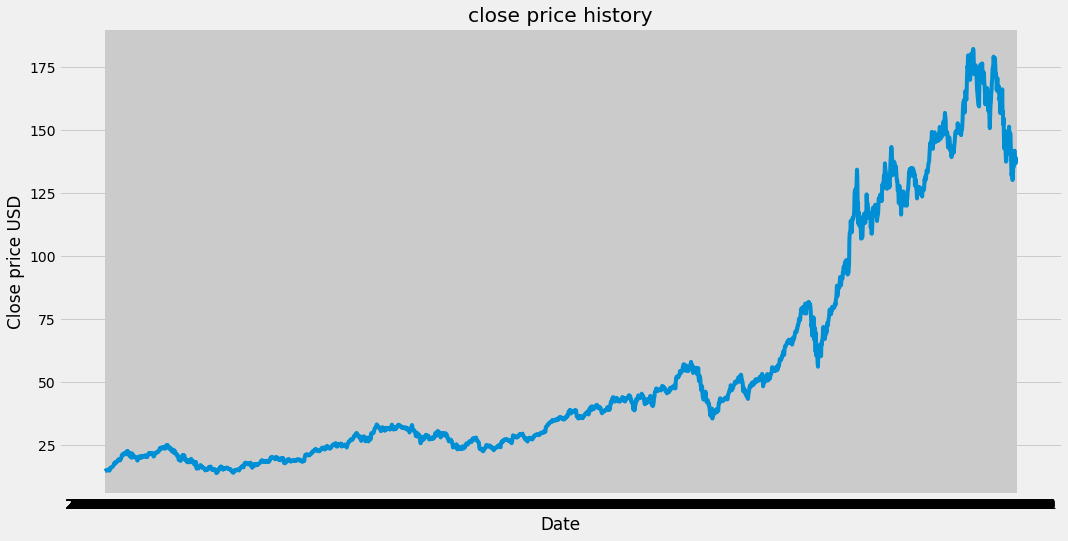

In [5]:
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(table['Close'])
plt.xlabel('Date')
plt.ylabel('Close price USD')
plt.show()

In [6]:
# new data frame with only the 'close'
data = table.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
# the number of rows to train the model
traning_data_len = math.ceil(len(dataset)*0.8)

traning_data_len

2114

In [7]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439888],
       [0.00486851],
       [0.00584392],
       ...,
       [0.74545184],
       [0.73051695],
       [0.74366677]])

In [8]:
# create the training data set
# create the scaled trainning data set
train_data = scaled_data[0:traning_data_len,:]
# split the data into x_train and y_train data set, x_train is for the date, y_train is for the value of stock
x_train = []
y_train = []
for i in range(num_of_day,len(train_data)):
  x_train.append(train_data[i-num_of_day:i,0])
  y_train.append(train_data[i,0])
  if i <= num_of_day:
    print(x_train)
    print(y_train)
    print()

[array([0.00439888, 0.00486851, 0.00584392, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655794, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149657, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527334])]
[0.02276789952451913]



In [9]:
# convert the x_train and y_train to numpy arrays
x_train, y_train =np.array(x_train),np.array(y_train)

In [10]:
# reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2084, 30, 1)

In [11]:
# build the lSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [12]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [22]:
# train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2084/2084 [==============================] - 13s 6ms/step - loss: 6.1057e-05


In [14]:
# create the test data
test_data = scaled_data[traning_data_len-num_of_day:,:]
x_test=[]
y_test=dataset[traning_data_len:,:]
for i in range(num_of_day,len(test_data)):
    x_test.append(test_data[i-num_of_day:i,0])

In [15]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
# reshape the x_test
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(528, 30, 1)

In [17]:
# get the model predicate price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 1s 4ms/step


In [18]:
# get the rmse
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse 

5.89360007656583

C:\Users\liang\AppData\Local\Temp\ipykernel_1236\2707768162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaild['Predications'] = predictions


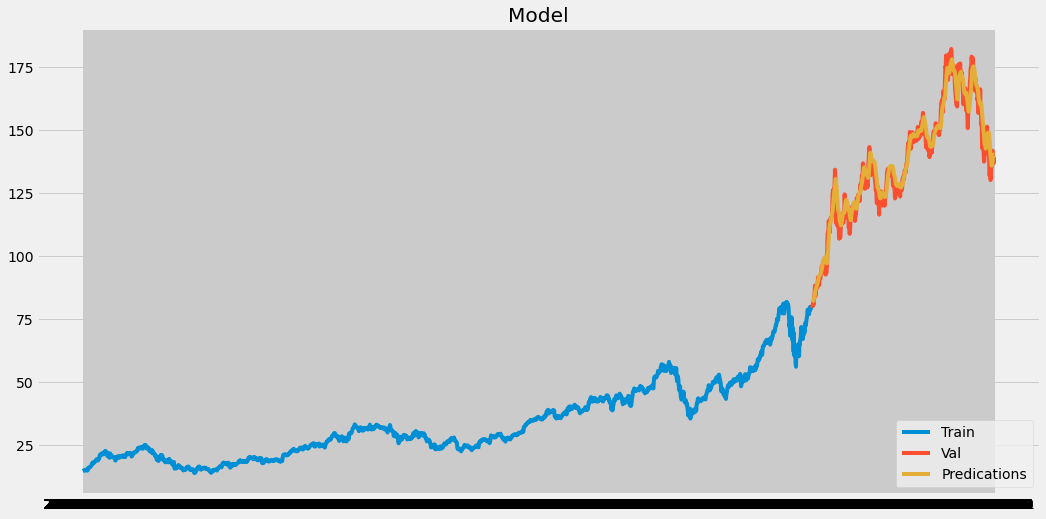

In [69]:
# plot the data
train = data[:traning_data_len]
vaild = data[traning_data_len:]
vaild['Predications'] = predictions
plt.figure(figsize = (16,8))
plt.title("Model")
plt.plot(train['Close'])
plt.plot(vaild[['Close','Predications']])
plt.legend(['Train','Val','Predications'],loc='lower right')
plt.show()

In [21]:
vaild

,Close,Predications
Date,,
2020-05-29,79.485001,82.856651
2020-06-01,80.462502,82.995300
2020-06-02,80.834999,83.192329
2020-06-03,81.279999,83.438354
2020-06-04,80.580002,83.732315
...,...,...
2022-06-27,141.660004,137.911667
2022-06-28,137.440002,138.872192
2022-06-29,139.229996,139.441025


In [22]:
new_df = table.tail(30).filter(['Close'])
new_df.info()
last_30_day = new_df.values
last_30_day_scaled = scaler.transform(last_30_day)
X_test = []
X_test.append(last_30_day_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
p_price = scaler.inverse_transform(pred_price)
print(p_price)

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2022-05-19 to 2022-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   30 non-null     float64
dtypes: float64(1)
memory usage: 480.0+ bytes
1/1 [==============================] - 0s 16ms/step
[[140.27393]]
